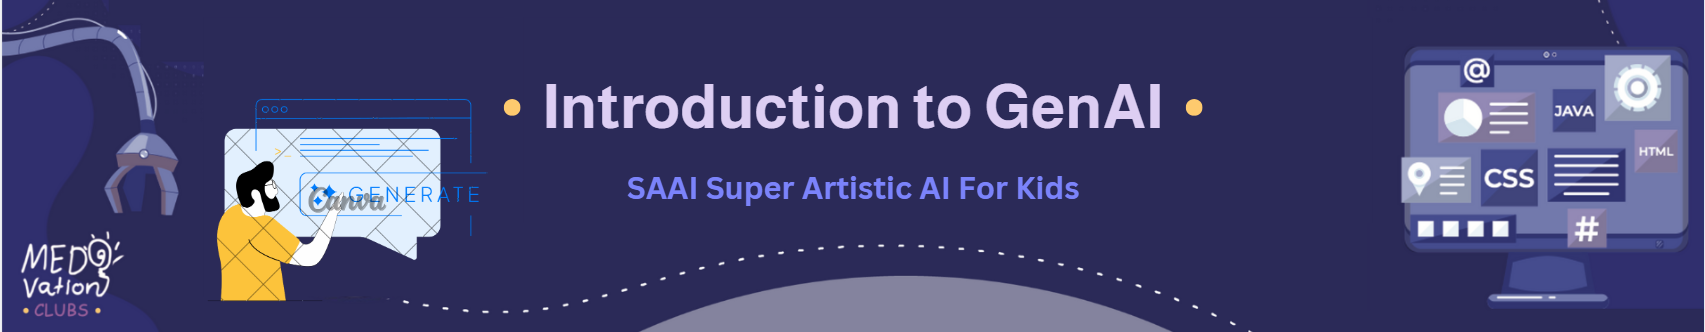

#  **Text Modality AI Lab: From text to Everything!**

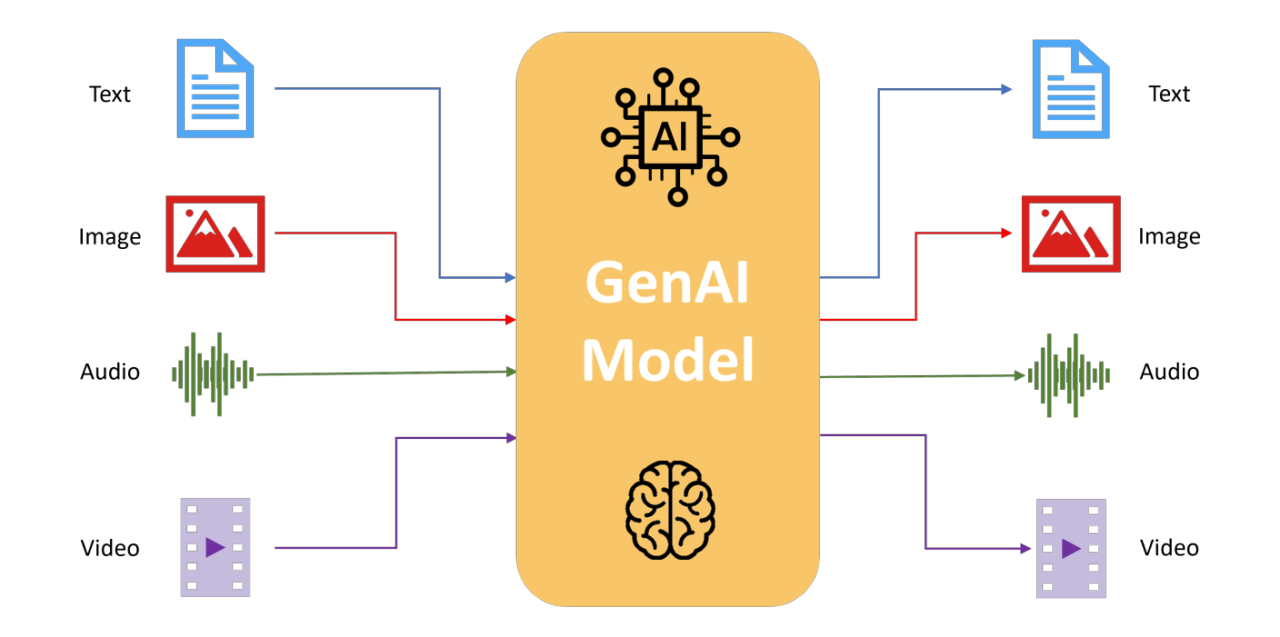

Image Source: https://www.linkedin.com/pulse/multimodal-generative-ai-tarun-sharma-zzf9c/

# Understanding the models in today's Lab:


## **1️. Stable Diffusion (Images):**
### **Input:** Takes a text prompt (e.g., "A serene lake at sunset with warm colors.").
### **How It Works:**

### 1️. Text Encoding (Embeddings):

- The text is processed using a transformer-based model to create text embeddings.
- These embeddings capture the semantic meaning of the input description.

### 2️. Random Noise Initialization:

- The model starts with a completely random noise image.

### 3️. Diffusion Process (Gradual Refinement):

- The model removes noise step by step, refining the image progressively.

- It uses patterns learned from training to generate details matching the text description.

### **Output**: A high-quality image is generated, visually aligned with the given text prompt.
---

## **2️. gTTS (Google Text-to-Speech)**:
### **Input:**
- Takes a text input (e.g., "Hello, welcome to AI voice synthesis!").
- Supports multiple languages (English, Arabic, French, etc.).

### **How It Works:**

### 1️. Understanding the Text:

- The model analyzes the input text, identifying language, tone, speed, and rhythm.
- Adjustments are made for pronunciation, pauses, and emphasis based on the text.

### 2️. Generating Audio Tokens:

- The text is converted into phonetic representations (audio tokens).
- These tokens define speech characteristics such as pitch, speed, and intonation.

### 3️. Waveform Synthesis:

- The model processes these tokens through a deep learning-based speech synthesis engine.
- It generates realistic waveforms (sound waves) that replicate human-like speech.

### **Output:**
- A playable audio file is produced that matches the original text input.
- The output speech is clear, natural, and human-like.
---
# **3️. Damo-Vilab Text-to-Video Model (Video)**
### **Input:** Takes a video description (e.g., "A futuristic city with flying cars zooming through neon-lit skyscrapers.").

### **How It Works:**
### 1️. Processing the Text Description:

- The text prompt is converted into semantic embeddings, capturing details about objects, motion, and environment.

### 2️. Key Frame Generation:
- The model generates key frames—still images that represent critical points in the video.

### 3️. Motion Interpolation & Frame Prediction:
- AI fills in the missing frames by predicting motion between key frames.
- This step ensures the video has smooth and realistic movement.

### 4. Diffusion Process (Gradual Refinement):
- Just like in Stable Diffusion, the model iteratively refines each frame, improving sharpness, texture, and motion consistency.


### **Output:** The frames are stitched together into a coherent video, maintaining fluid motion and high visual quality.

In [ ]:
# Install required libraries
!pip install gTTS imageio soundfile diffusers transformers torch torchaudio datasets accelerate scipy safetensors

In [ ]:
# Import necessary libraries
import torch # PyTorch for deep learning
from gtts import gTTS  # Google Text-to-Speech (TTS) for generating audio from text
import io  # Used to handle in-memory file operations
import cv2 # OpenCV for handling image and video processing
import tempfile  # For creating temporary files
import os # Operating system module to manage file paths
from PIL import Image  # Pillow library for handling images
import ipywidgets as widgets  # For creating interactive UI elements in Jupyter Notebook
from diffusers import StableDiffusionPipeline, DiffusionPipeline, DPMSolverMultistepScheduler # Stable Diffusion for AI-generated images and videos
from diffusers.utils import export_to_video # Function to export generated images into video format
from transformers import pipeline, AutoProcessor, MusicgenForConditionalGeneration # Transformer-based AI models for text and music generation
import torchaudio # Audio processing library in PyTorch
from IPython.display import Image, Audio, HTML, display, clear_output  # Display multimedia content in Jupyter Notebook
import numpy as np  # Numerical computation library
import matplotlib.pyplot as plt # For visualizing images and videos
import gc  # Garbage collection to free memory
import imageio  # For saving and handling videos
import base64  # Encoding binary files into Base64 for embedding in HTML
import warnings # Suppress warning messages
import traceback
warnings.filterwarnings('ignore')  # Suppress warnings to keep the output clean

## **1. Text-to-Image Generation**


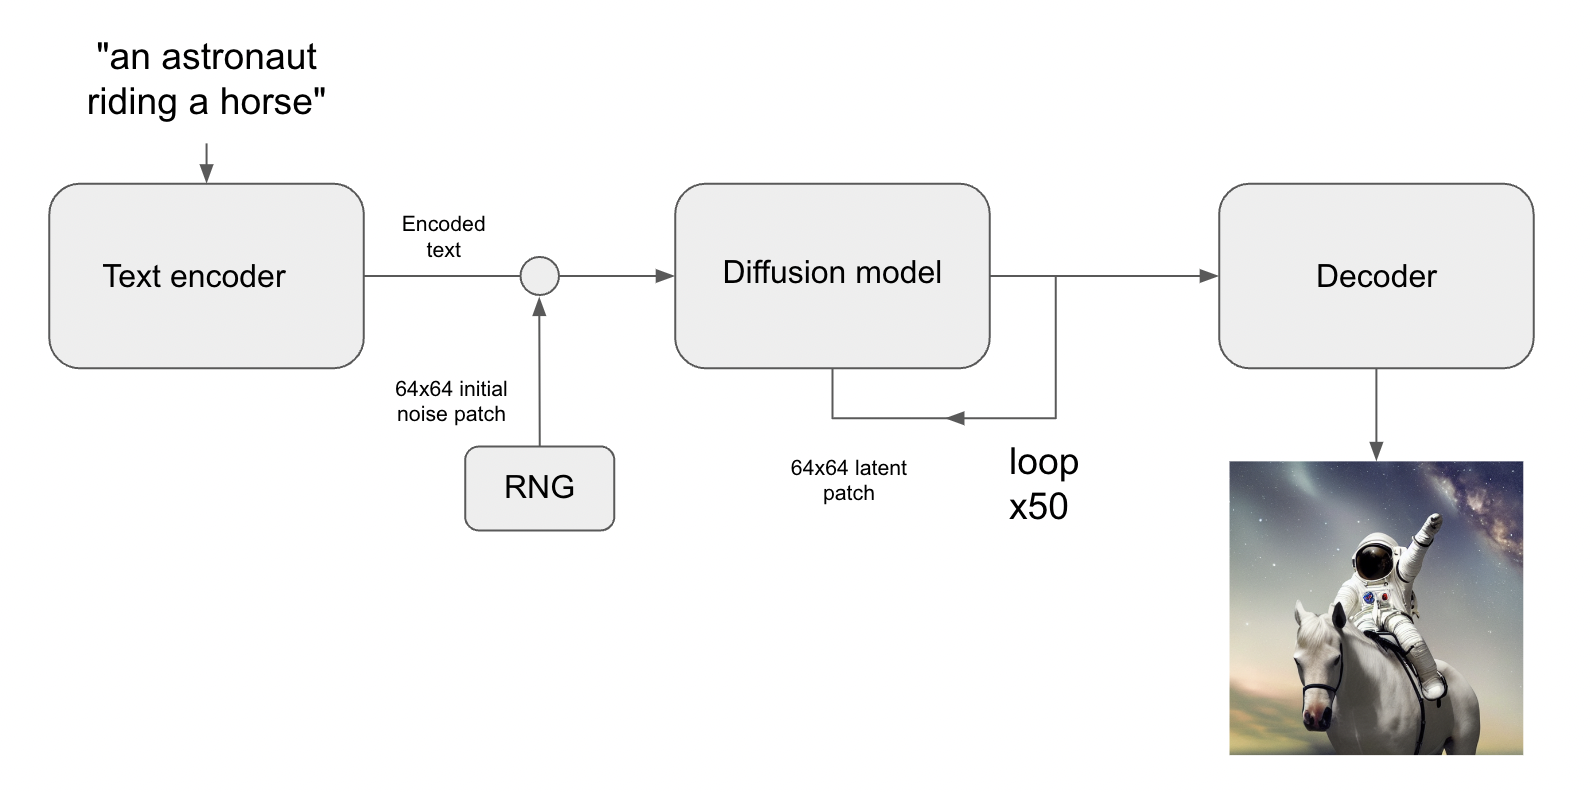

Image Source: https://blog.payrollschedule.net/

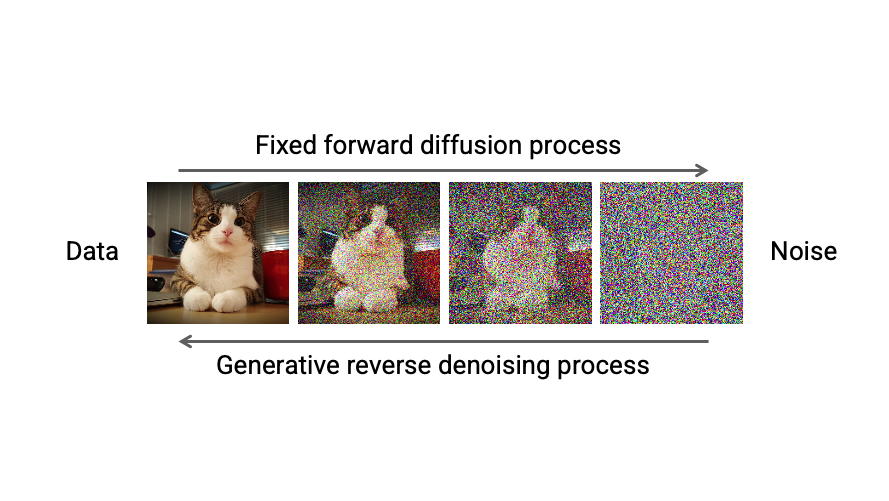

Image Source: https://blog.payrollschedule.net/

Keyword arguments {'low_memory': True} are not expected by StableDiffusionPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


Generating image for prompt: 'An astronaut riding a horse on Mars,digital art style '


  0%|          | 0/20 [00:00<?, ?it/s]

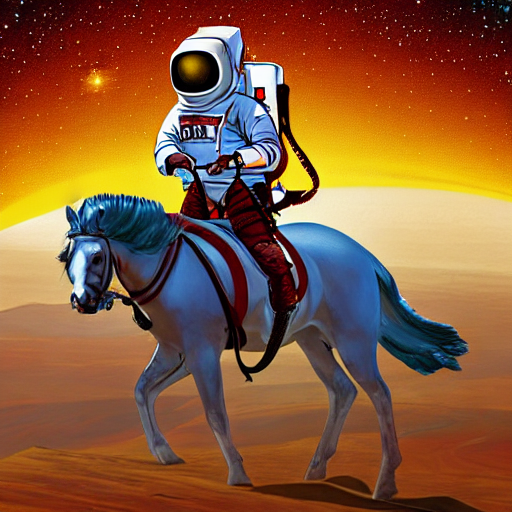

In [ ]:
def setup_stable_diffusion():
    """
    Load and configure Stable Diffusion model for generating AI-generated images.
    The model takes a text prompt and creates a corresponding image.
    """
    model_id = "CompVis/stable-diffusion-v1-4" # Stable Diffusion model version
    pipe = StableDiffusionPipeline.from_pretrained(
        model_id,
        torch_dtype=torch.float16, # Use float16 for optimized GPU performance
        safety_checker=None, # Disables safety filters (optional)
        low_memory=True # Enables low-memory mode for better performance on limited devices
    )

    # Move the model to GPU if available
    if torch.cuda.is_available():
        pipe = pipe.to("cuda")  # Move model to CUDA (GPU)
        pipe.enable_attention_slicing(slice_size=1) # Optimize attention mechanism
        pipe.enable_model_cpu_offload()  # Load parts of the model dynamically to CPU/GPU
    return pipe  # Return the configured pipeline

def generate_image_from_text(pipe, prompt, num_inference_steps=20):
    """
    Generate an image from a given text prompt using Stable Diffusion.
    - `pipe`: The Stable Diffusion model pipeline.
    - `prompt`: The text description to generate the image.
    - `num_inference_steps`: Number of steps for image refinement.
    """
    try:
        print(f"Generating image for prompt: '{prompt}'")
        image = pipe(
            prompt,
            num_inference_steps=num_inference_steps,
            guidance_scale=7.0, # Adjusts how much AI follows the prompt strictly
            height=512, # Image height
            width=512   # Image width
        ).images[0]     # Extract the generated image

        return image
    except Exception as e:
        print(f"Error generating image: {str(e)}")
        return None  # Return None in case of an error

# Free GPU memory before starting
torch.cuda.empty_cache()

# Example prompts to test text-to-image generation
example_prompts = [
    "A serene lake surrounded by mountains at sunset",
    "A futuristic city with flying cars",
    "A magical forest with glowing mushrooms",
    "An astronaut riding a horse on Mars"
]

pipe = setup_stable_diffusion() # Load the Stable Diffusion model
test_prompt = "An astronaut riding a horse on Mars,digital art style "  # Start with a simpler prompt

# Generate and display an image from text
image = generate_image_from_text(pipe, test_prompt)
if image is not None:
    display(image)

Generating image for prompt: 'A serene lake surrounded by mountains at sunset, fantasy illustration'


  0%|          | 0/20 [00:00<?, ?it/s]

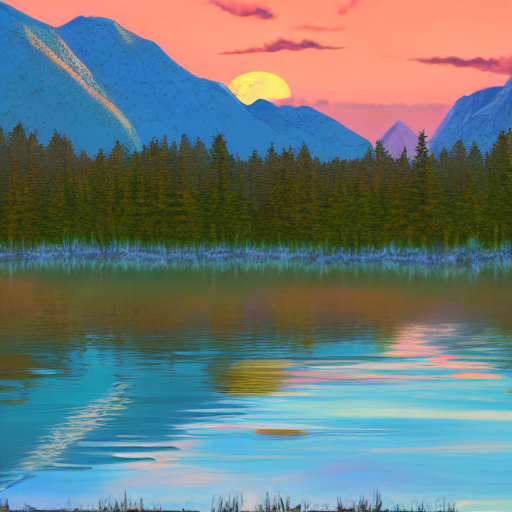

In [ ]:
test_prompt = "A serene lake surrounded by mountains at sunset, fantasy illustration"

# Generate and display an image from text
image = generate_image_from_text(pipe, test_prompt)
if image is not None:
    display(image)

Generating image for prompt: 'A serene lake surrounded by mountains at sunset, fantasy illustration'


  0%|          | 0/20 [00:00<?, ?it/s]

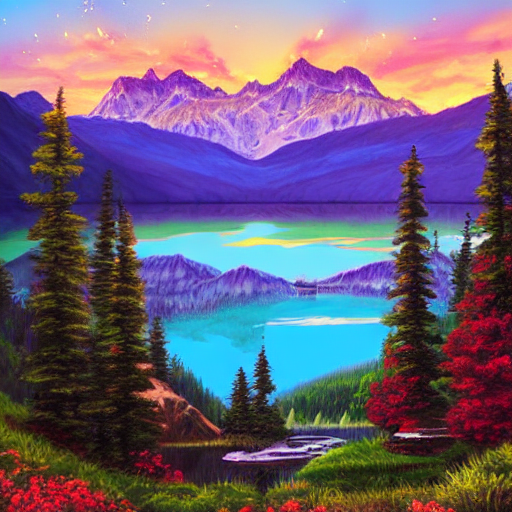

In [ ]:
test_prompt = "A serene lake surrounded by mountains at sunset, fantasy illustration"

# Generate and display an image from text
image = generate_image_from_text(pipe, test_prompt)
if image is not None:
    display(image)

Generating image for prompt: 'A futuristic city with flying cars, cyberpunk neon-lit style'


  0%|          | 0/20 [00:00<?, ?it/s]

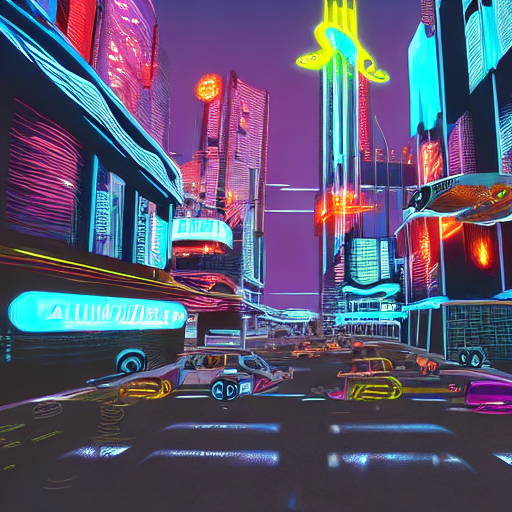

In [ ]:
test_prompt = "A futuristic city with flying cars, cyberpunk neon-lit style"

# Generate and display an image from text
image = generate_image_from_text(pipe, test_prompt)
if image is not None:
    display(image)

Generating image for prompt: 'A futuristic city with flying cars, anime sci-fi style'


  0%|          | 0/20 [00:00<?, ?it/s]

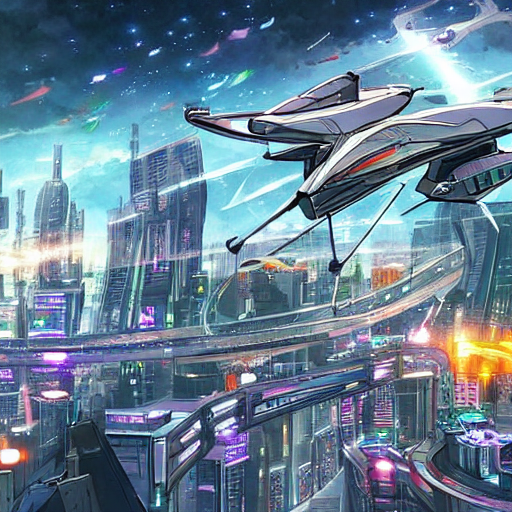

In [ ]:
test_prompt = "A futuristic city with flying cars, anime sci-fi style"

# Generate and display an image from text
image = generate_image_from_text(pipe, test_prompt)
if image is not None:
    display(image)

Generating image for prompt: 'A futuristic city, traditional Japanese Ukiyo-e style'


  0%|          | 0/20 [00:00<?, ?it/s]

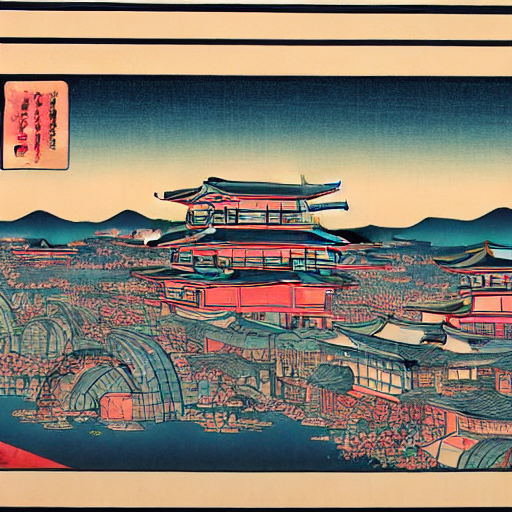

In [ ]:
test_prompt = "A futuristic city, traditional Japanese Ukiyo-e style"

# Generate and display an image from text
image = generate_image_from_text(pipe, test_prompt)
if image is not None:
    display(image)

## **2. Text-to-Audio Generation**

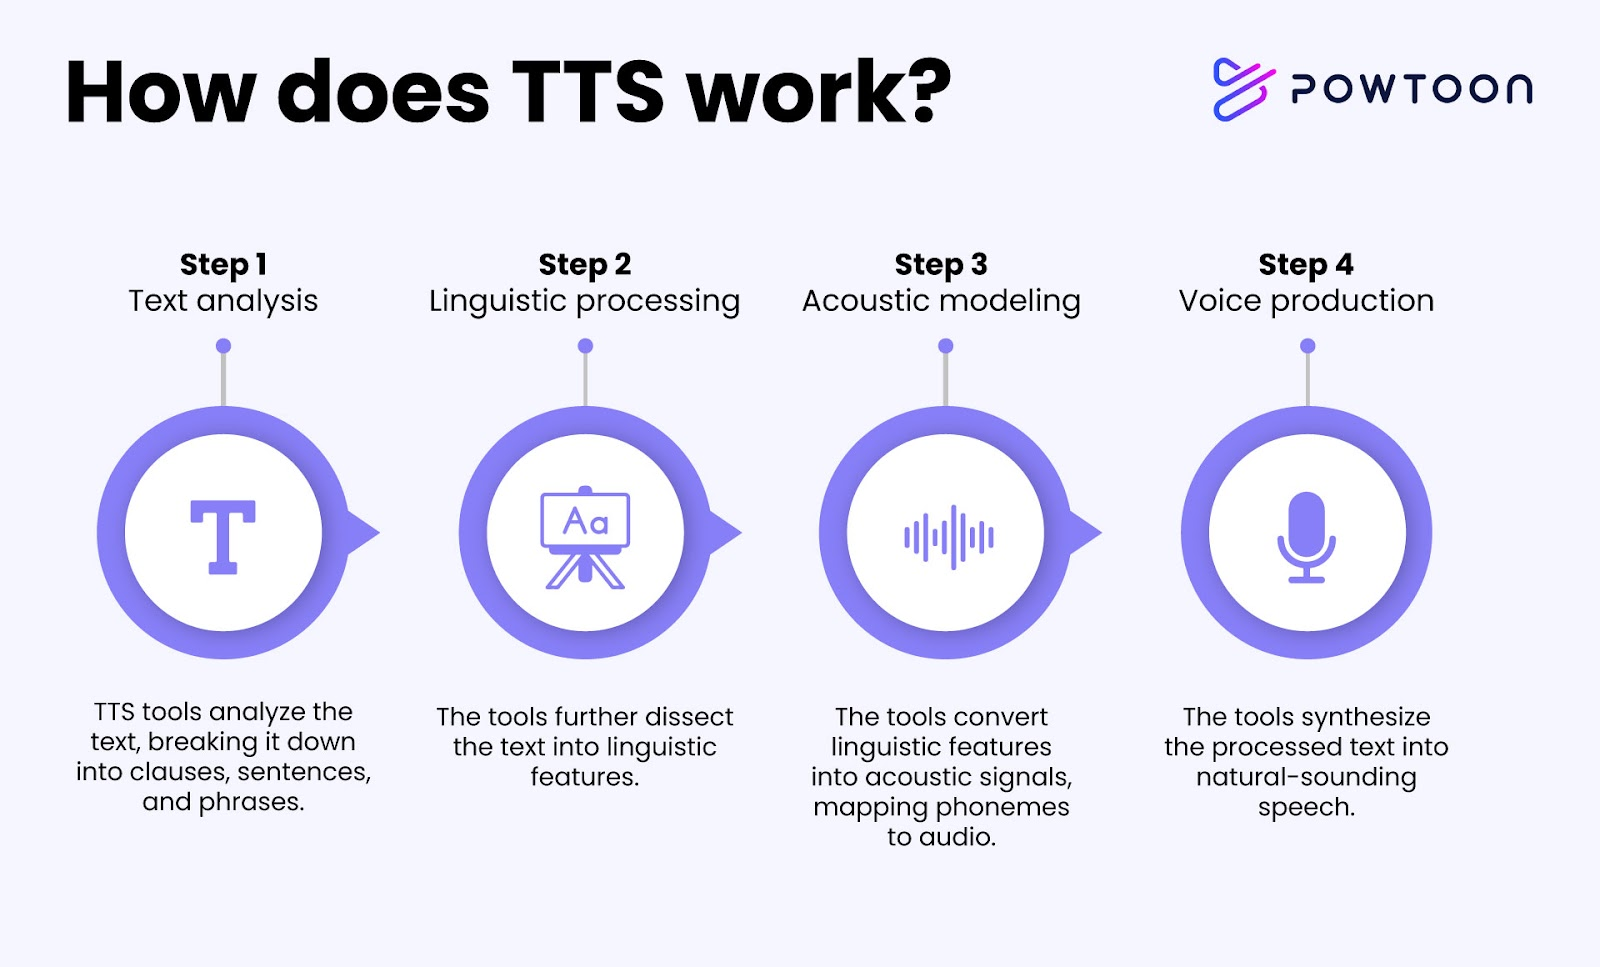

Image Source: https://www.powtoon.com/blog/what-is-text-to-speech/

In [ ]:
def generate_speech_from_text(text, lang='en'):
    """
    Convert text into speech using Google Text-to-Speech (gTTS).
    - `text`: The input text.
    - `lang`: The language in which speech should be generated.
    """
    try:
        print(f"Generating speech for: '{text}'")

         # Create a buffer for storing audio
        mp3_fp = io.BytesIO()

        # Initialize Google TTS and generate speech
        tts = gTTS(text=text, lang=lang, slow=False)
        tts.write_to_fp(mp3_fp) # Save generated speech to the buffer
        mp3_fp.seek(0)  # Move pointer to the beginning of buffer

        return Audio(mp3_fp.read(), autoplay=False)  # Return the audio file

    except Exception as e:
        print(f"Error generating speech: {str(e)}")
        return None # Return None in case of an error

def create_speech_interface():
    from ipywidgets import widgets, Layout

    # Generate a simple text-to-speech example
    text_input = widgets.Textarea(
        value='Hello, this is a test.',
        placeholder='Type your text here...',
        description='Text:',
        disabled=False,
        layout=Layout(width='500px', height='100px')
    )

    # Create language dropdown
    language_select = widgets.Dropdown(
        options=[
            ('English', 'en'),
            ('Arabic', 'ar'),
            ('French', 'fr'),
            ('German', 'de'),
            ('Spanish', 'es'),
            ('Italian', 'it'),
            ('Japanese', 'ja'),
            ('Korean', 'ko'),
            ('Chinese', 'zh')
        ],
        value='en',
        description='Language:',
        disabled=False,
    )

    # Create generate button
    generate_button = widgets.Button(description='Generate Speech')
    output = widgets.Output()

    def on_button_clicked(b):
        with output:
            output.clear_output()
            audio = generate_speech_from_text(text_input.value, language_select.value)
            if audio is not None:
                display(audio)

    generate_button.on_click(on_button_clicked)

    # Display widgets
    display(text_input, language_select, generate_button, output)

# Test with a simple prompt
print("Testing speech generation...")
test_text = "Hello, this is a test of the text-to-speech system."
audio = generate_speech_from_text(test_text)
if audio is not None:
    display(audio)

print("\nCreating interactive interface...")
create_speech_interface()

Testing speech generation...
Generating speech for: 'Hello, this is a test of the text-to-speech system.'



Creating interactive interface...


Textarea(value='Hello, this is a test.', description='Text:', layout=Layout(height='100px', width='500px'), pl…

Dropdown(description='Language:', options=(('English', 'en'), ('Arabic', 'ar'), ('French', 'fr'), ('German', '…

Button(description='Generate Speech', style=ButtonStyle())

Output()

## **3. Text-to-Video Generation**




In [ ]:
def clear_memory():
    """Clear memory regardless of device."""
    gc.collect()  # Runs Python’s garbage collector
    if torch.cuda.is_available():
        torch.cuda.empty_cache()  # Clears unused GPU memory

In [ ]:
def setup_text2video():
    """
    Load and configure the Text-to-Video AI model.
    The model generates videos from textual descriptions.
    """
    try:
        print("Loading text-to-video model...")
        clear_memory()  # Free any unused memory before loading

           # Load the pretrained Damo-Vilab Text-to-Video model from Hugging Face
        pipe = DiffusionPipeline.from_pretrained(
            "damo-vilab/text-to-video-ms-1.7b",
            torch_dtype=torch.float16 if torch.cuda.is_available() else torch.float32  # Use FP16 on GPU for efficiency
        )

        # Move the model to GPU if available
        device = "cuda" if torch.cuda.is_available() else "cpu"
        pipe = pipe.to(device)

        # Enable memory optimizations
        pipe.enable_attention_slicing()  # Reduce memory usage for attention layers
        pipe.enable_vae_slicing() # Optimize Variational Autoencoder (VAE) memory usage

        return pipe # Return the configured model pipeline
    except Exception as e:
        print(f"Error setting up model: {str(e)}")
        return None  # Return None if model setup fails


In [ ]:
def generate_video_from_text(pipe, prompt, num_frames=16, num_inference_steps=50):
    """
    Generates a video based on a text description.
    - `pipe`: The text-to-video AI model pipeline.
    - `prompt`: The description of the video to be generated.
    - `num_frames`: The number of frames in the output video.
    - `num_inference_steps`: Controls video quality and detail.
    """
    try:
        print(f"Generating video for prompt: '{prompt}'")

        # Generate video frames using the AI model
        output = pipe(
            prompt,
            num_inference_steps=num_inference_steps,
            num_frames=num_frames,
            height=192, # Set video height
            width=192  # Set video width
        )
        return output.frames # Return generated frames
    except Exception as e:
        print(f"Error generating video: {str(e)}")
        return None  # Return None in case of an error

In [ ]:
def display_video_frames_grid(frames, rows=2, cols=2):
    """
    Displays video frames in a grid layout.
    - `frames`: The generated video frames.
    - `rows`: Number of rows in the grid.
    - `cols`: Number of columns in the grid.
    """
    if frames is None:
        print("No frames to display")
        return

    fig, axes = plt.subplots(rows, cols, figsize=(10, 10))  # Create a figure with subplots
    axes_flat = axes.flatten() if isinstance(axes, np.ndarray) else [axes]  # Flatten the axes for easy iteration

    for idx, ax in enumerate(axes_flat):
        if idx < len(frames):
            ax.imshow(frames[idx]) # Show each frame in the grid
            ax.axis('off') # Remove axes for better visualization
            ax.set_title(f'Frame {idx+1}')  # Label each frame
        else:
            ax.axis('off')

    plt.tight_layout()
    plt.show()

In [ ]:
def display_video_animation(frames, interval=200):
    """
    Displays frames as an animation.
    - `frames`: The generated video frames.
    - `interval`: The time (ms) between frames.
    """
    if frames is None:
        print("No frames to display")
        return

    plt.figure(figsize=(8, 8))

    for i, frame in enumerate(frames):
        plt.clf()
        plt.imshow(frame)  # Display each frame
        plt.axis('off')
        plt.title(f'Frame {i+1}/{len(frames)}')
        plt.pause(interval/1000)  # Pause for smooth animation

    plt.close()

In [ ]:
def process_frame(frame):
    """
    Process a single frame to ensure correct format for video saving.

    """

    try:
        # Convert PIL Image to numpy array if necessary
        if hasattr(frame, 'numpy'):
            frame = frame.numpy()
        elif not isinstance(frame, np.ndarray):
            frame = np.array(frame)

        # Handle grayscale images
        if frame.ndim == 2:
            frame = np.stack([frame] * 3, axis=-1)

        # Handle RGBA images
        if frame.ndim == 3 and frame.shape[-1] == 4:
            frame = frame[..., :3]

        # Normalize values to 0-255 range if needed
        if frame.dtype != np.uint8:
            if frame.max() <= 1.0:
                frame = (frame * 255).clip(0, 255)
            frame = frame.astype(np.uint8)

        return frame

    except Exception as e:
        print(f"Error processing frame: {str(e)}")
        traceback.print_exc()
        return None

In [ ]:
def save_and_display_video(frames, fps=8):
    """
    Saves video frames and displays the video in a Jupyter Notebook.

    """
    try:
        with tempfile.NamedTemporaryFile(suffix=".mp4", delete=False) as tmp_file:
            # Handle different frame formats
            if isinstance(frames, np.ndarray) and frames.ndim == 5: # Convert frames to numpy array
                frames = np.squeeze(frames, axis=0)

            if isinstance(frames, np.ndarray) and frames.ndim == 4:
                frames = [frame for frame in frames]

            # Process each frame
            processed_frames = []
            for frame in frames:
                processed_frame = process_frame(frame)  # Using the process_frame function
                processed_frames.append(processed_frame)

            # Save the video
            imageio.mimsave(tmp_file.name, processed_frames, fps=fps)

            # # Read and encode the video
            with open(tmp_file.name, "rb") as f:
                video_base64 = base64.b64encode(f.read()).decode()

            # Create an HTML video tag to embed the video in the notebook
            video_html = f"""
            <video width="400" height="400" controls autoplay loop>
                <source src="data:video/mp4;base64,{video_base64}" type="video/mp4">
                Your browser does not support the video tag.
            </video>
            """

            # Clean up temporary file
            os.unlink(tmp_file.name)

            return HTML(video_html) # Return HTML to display the video
    except Exception as e:
        print(f"Error saving and displaying video: {str(e)}")
        traceback.print_exc()
        return None

In [ ]:
def create_video_interface():
    """
    Create an interactive interface for video generation.

    """


    # Text input box for entering the video description
    text_input = widgets.Text(
        value="A butterfly flying in a garden",
        description="Prompt:",
        layout=widgets.Layout(width="500px")
    )

     # Sliders for controlling inference steps, frames, and FPS
    steps_slider = widgets.IntSlider(
        value=20,
        min=10,
        max=50,
        step=5,
        description="Steps:"
    )

    frames_slider = widgets.IntSlider(
        value=16,
        min=4,
        max=32,
        step=4,
        description="Frames:"
    )

    fps_slider = widgets.IntSlider(
        value=8,
        min=1,
        max=30,
        step=1,
        description="FPS:"
    )


    # Generate button to trigger video generation
    generate_button = widgets.Button(description="Generate Video")
    output = widgets.Output()

    def on_button_clicked(b):
        """
        Handles button click events to generate and display video.

        """
        with output:
            try:
                clear_output(wait=True)  # Clear previous outputs
                print("Processing...")

                # Initialize model (only once)
                if not hasattr(on_button_clicked, 'pipe'):
                    on_button_clicked.pipe = setup_text2video()

                if on_button_clicked.pipe is not None:
                    frames = generate_video_from_text(
                        on_button_clicked.pipe,
                        text_input.value,
                        num_frames=frames_slider.value,
                        num_inference_steps=steps_slider.value
                    )

                    if frames is not None:
                        print("Generating video...")
                        video_player = save_and_display_video(frames, fps=fps_slider.value)
                        if video_player is not None:
                            display(video_player)
                        else:
                            print("Failed to create video player.")
                    else:
                        print("Failed to generate frames.")
                else:
                    print("Failed to load the model.")

            except Exception as e:
                print(f"Error in video generation: {str(e)}")
                traceback.print_exc()

            finally:
                clear_memory()

    generate_button.on_click(on_button_clicked)

    # Display UI components
    display(text_input)
    display(widgets.HBox([steps_slider, frames_slider, fps_slider]))
    display(generate_button)
    display(output)

In [ ]:
# Initialize interface
print("Setting up video generation interface...")
torch.cuda.empty_cache()
gc.collect()
create_video_interface()

Processing...
Loading text-to-video model...


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

Generating video for prompt: 'A butterfly flying in a garden'


  0%|          | 0/20 [00:00<?, ?it/s]

Generating video...


In [ ]:
# Initialize interface
create_video_interface()

Text(value='A butterfly flying in a garden', description='Prompt:', layout=Layout(width='500px'))

Button(description='Generate Video', style=ButtonStyle())

Output()

In [ ]:
# Initialize interface
create_video_interface()

Text(value='A butterfly flying in a garden', description='Prompt:', layout=Layout(width='500px'))

Button(description='Generate Video', style=ButtonStyle())

Output()

In [ ]:
# Initialize interface
create_video_interface()

Text(value='A butterfly flying in a garden', description='Prompt:', layout=Layout(width='500px'))

Button(description='Generate Video', style=ButtonStyle())

Output()